## Data understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

price_df = pd.read_csv("kc_house_data.csv")
price_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [2]:
price_df.shape

(21613, 21)

In [3]:
price_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
price_df.isnull().values.any()

False

### Some features are very helpful and can be used as is where others need to be transformed in order to use

- Dependent Variable
    - Price
    
- Independent Variable (as is)
    - bedrooms
    - bathrooms
    - sqft_living
    - sqft_lot
    - floors
    - waterfront
    - view
    - condition
    - grade
    
- Independent Variable (transform)
    - Age (date - yr_built)
    
- Independent Variable (ignore/drop)
    - id
    - sqft_above/basement - these make up sq_ft living
    - yr_renovated
    - zipcode
    - lat/lon - this would be key to merge with other dataset, ex. distance from schools
    - sqft_living15/sqft_lot15 - nonsense

In [5]:
# Transform date and yr_built into something we can use
age = []
for index, row in price_df.iterrows():
    age.append(int(row.date[:4]) - int(row.yr_built))

price_df['age'] = age

In [6]:
price_df = price_df.drop(['id'],axis=1)
price_df = price_df.drop(['sqft_above'],axis=1)
price_df = price_df.drop(['sqft_basement'],axis=1)
price_df = price_df.drop(['yr_renovated'],axis=1)
price_df = price_df.drop(['zipcode'],axis=1)
price_df = price_df.drop(['lat'],axis=1)
price_df = price_df.drop(['long'],axis=1)
price_df = price_df.drop(['sqft_living15'],axis=1)
price_df = price_df.drop(['sqft_lot15'],axis=1)
price_df = price_df.drop(['date'], axis=1)
price_df = price_df.drop(['yr_built'], axis=1)

In [7]:
price_df.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront       int64
view             int64
condition        int64
grade            int64
age              int64
dtype: object

In [8]:
price_df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,28
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,13
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,19
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,52
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,55
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,12


In [9]:
price_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,age
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,43.317818
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,29.375493
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,115.000000


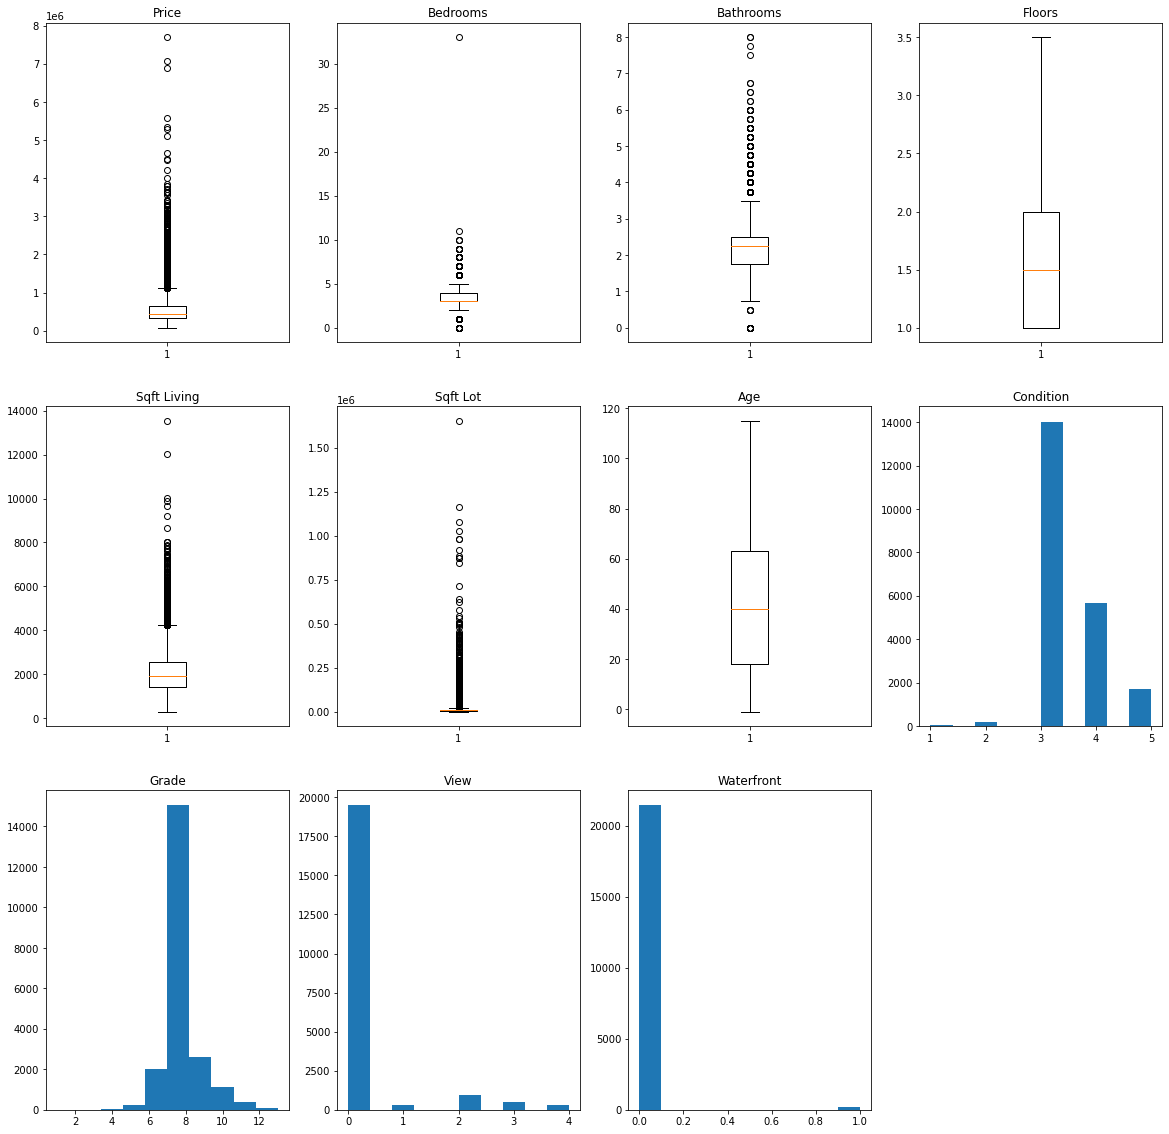

In [10]:
fig, axs = plt.subplots(3, 4, figsize=(20,20))

axs[0][0].boxplot(price_df['price'])
axs[0][0].set_title('Price')
axs[0][1].boxplot(price_df['bedrooms'])
axs[0][1].set_title('Bedrooms')
axs[0][2].boxplot(price_df['bathrooms'])
axs[0][2].set_title('Bathrooms')
axs[0][3].boxplot(price_df['floors'])
axs[0][3].set_title('Floors')
axs[1][0].boxplot(price_df['sqft_living'])
axs[1][0].set_title('Sqft Living')
axs[1][1].boxplot(price_df['sqft_lot'])
axs[1][1].set_title('Sqft Lot')
axs[1][2].boxplot(price_df['age'])
axs[1][2].set_title('Age')
axs[1][3].hist(price_df['condition'])
axs[1][3].set_title('Condition')
axs[2][0].hist(price_df['grade'])
axs[2][0].set_title('Grade')
axs[2][1].hist(price_df['view'])
axs[2][1].set_title('View')
axs[2][2].hist(price_df['waterfront'])
axs[2][2].set_title('Waterfront')

axs[2,3].set_axis_off()

## Data Preprocessing

In [11]:
dups = price_df.duplicated()
dups
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [12]:
print('Number of rows before discarding duplicates = %d' % (price_df.shape[0]))
price_df = price_df.drop_duplicates()
print('Number of rows before discarding duplicates = %d' % (price_df.shape[0]))

Number of rows before discarding duplicates = 21613
Number of rows before discarding duplicates = 21605


In [13]:
X = price_df[['bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'view', 'waterfront']]
y = price_df[['price']]

In [14]:
# Manage outliers
price_df = price_df[np.abs(price_df.price-price_df.price.mean()) <= (3*price_df.price.std())]

In [15]:
train_price_df, test_price_df = train_test_split(price_df, test_size=0.3, random_state=1, shuffle=True)


train_bed = train_price_df[['bedrooms']]
test_bed = test_price_df[['bedrooms']]

train_bath = train_price_df[['bathrooms']]
test_bath = test_price_df[['bathrooms']]

train_live = train_price_df[['sqft_living']]
test_live = test_price_df[['sqft_living']]

train_lot = train_price_df[['sqft_lot']]
test_lot = test_price_df[['sqft_lot']]

train_floor = train_price_df[['floors']]
test_floor = test_price_df[['floors']]

train_water = train_price_df[['waterfront']]
test_water = test_price_df[['waterfront']]

train_view = train_price_df[['view']]
test_view = test_price_df[['view']]

train_cond = train_price_df[['condition']]
test_cond = test_price_df[['condition']]

train_grade = train_price_df[['grade']]
test_grade = test_price_df[['grade']]

train_age = train_price_df[['age']]
test_age = test_price_df[['age']]


train_price = train_price_df[['price']]
test_price = test_price_df[['price']]

In [16]:
train_live_bed_bath = train_price_df[['sqft_living', 'bedrooms', 'bathrooms']]
test_live_bed_bath = test_price_df[['sqft_living', 'bedrooms', 'bathrooms']]

train_live_bed_bath_floor_lot_cond_grade_view_water_age = train_price_df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'condition', 'grade', 'view', 'waterfront', 'age']]
test_live_bed_bath_floor_lot_cond_grade_view_water_age = test_price_df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'condition', 'grade', 'view', 'waterfront', 'age']]


# Notice that Sqft_living + Bathrooms are strongly correlated, as are Sqft_living + Grade
# Keep this in mind when considering multicollinearity

## Data Visualization

In [17]:
price_df_corr = price_df.corr()
price_df_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,age
price,1.000000,0.311224,0.494806,0.664977,0.091315,0.278132,0.100951,0.318210,0.036619,0.672197,-0.060560
bedrooms,0.311224,1.000000,0.505398,0.581182,0.029884,0.164769,-0.036252,0.053700,0.025415,0.340095,-0.158493
bathrooms,0.494806,0.505398,1.000000,0.734560,0.078367,0.502668,0.006135,0.135366,-0.132786,0.639451,-0.527118
sqft_living,0.664977,0.581182,0.734560,1.000000,0.168795,0.350095,0.016021,0.220786,-0.069421,0.738442,-0.343600
sqft_lot,0.091315,0.029884,0.078367,0.168795,1.000000,-0.013160,0.023138,0.070548,-0.006565,0.102140,-0.049203
floors,0.278132,0.164769,0.502668,0.350095,-0.013160,1.000000,0.001623,0.005653,-0.270357,0.456642,-0.498668
waterfront,0.100951,-0.036252,0.006135,0.016021,0.023138,0.001623,1.000000,0.324530,0.014909,0.009319,0.039727
view,0.318210,0.053700,0.135366,0.220786,0.070548,0.005653,0.324530,1.000000,0.038192,0.192723,0.061418
condition,0.036619,0.025415,-0.132786,-0.069421,-0.006565,-0.270357,0.014909,0.038192,1.000000,-0.157830,0.356480
grade,0.672197,0.340095,0.639451,0.738442,0.102140,0.456642,0.009319,0.192723,-0.157830,1.000000,-0.469422


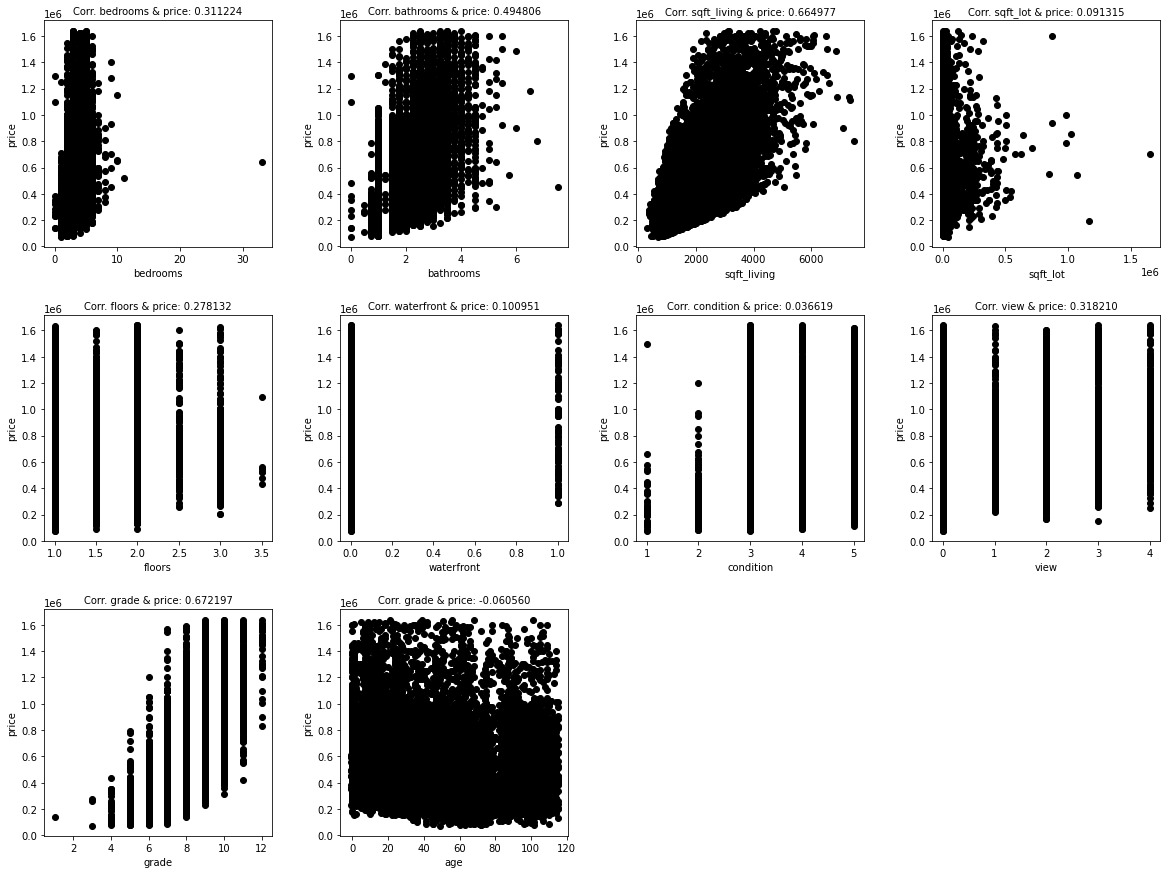

In [18]:
# Create scatter plots of relationships between independent variables with dependent variable
fig, axs = plt.subplots(3, 4, figsize=(20,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

axs[0][0].scatter(price_df['bedrooms'], price_df['price'], color='black')
axs[0][0].set_title('Corr. bedrooms & price: %2f' % price_df_corr['bedrooms']['price'], fontsize=10)
axs[0][0].set_xlabel('bedrooms')
axs[0][0].set_ylabel('price')

axs[0][1].scatter(price_df['bathrooms'], price_df['price'], color='black')
axs[0][1].set_title('Corr. bathrooms & price: %2f' % price_df_corr['bathrooms']['price'], fontsize=10)
axs[0][1].set_xlabel('bathrooms')
axs[0][1].set_ylabel('price')

axs[0][2].scatter(price_df['sqft_living'], price_df['price'], color='black')
axs[0][2].set_title('Corr. sqft_living & price: %2f' % price_df_corr['sqft_living']['price'], fontsize=10)
axs[0][2].set_xlabel('sqft_living')
axs[0][2].set_ylabel('price')

axs[0][3].scatter(price_df['sqft_lot'], price_df['price'], color='black')
axs[0][3].set_title('Corr. sqft_lot & price: %2f' % price_df_corr['sqft_lot']['price'], fontsize=10)
axs[0][3].set_xlabel('sqft_lot')
axs[0][3].set_ylabel('price')

axs[1][0].scatter(price_df['floors'], price_df['price'], color='black')
axs[1][0].set_title('Corr. floors & price: %2f' % price_df_corr['floors']['price'], fontsize=10)
axs[1][0].set_xlabel('floors')
axs[1][0].set_ylabel('price')

axs[1][1].scatter(price_df['waterfront'], price_df['price'], color='black')
axs[1][1].set_title('Corr. waterfront & price: %2f' % price_df_corr['waterfront']['price'], fontsize=10)
axs[1][1].set_xlabel('waterfront')
axs[1][1].set_ylabel('price')

axs[1][2].scatter(price_df['condition'], price_df['price'], color='black')
axs[1][2].set_title('Corr. condition & price: %2f' % price_df_corr['condition']['price'], fontsize=10)
axs[1][2].set_xlabel('condition')
axs[1][2].set_ylabel('price')

axs[1][3].scatter(price_df['view'], price_df['price'], color='black')
axs[1][3].set_title('Corr. view & price: %2f' % price_df_corr['view']['price'], fontsize=10)
axs[1][3].set_xlabel('view')
axs[1][3].set_ylabel('price')

axs[2][0].scatter(price_df['grade'], price_df['price'], color='black')
axs[2][0].set_title('Corr. grade & price: %2f' % price_df_corr['grade']['price'], fontsize=10)
axs[2][0].set_xlabel('grade')
axs[2][0].set_ylabel('price')

axs[2][1].scatter(price_df['age'], price_df['price'], color='black')
axs[2][1].set_title('Corr. grade & price: %2f' % price_df_corr['age']['price'], fontsize=10)
axs[2][1].set_xlabel('age')
axs[2][1].set_ylabel('price')

axs[2,2].set_axis_off()
axs[2,3].set_axis_off()

## Linear Regression Data Models

In [19]:
regr_live = linear_model.LinearRegression()
regr_live_bed_bath = linear_model.LinearRegression()
regr_live_bed_bath_floor_lot_cond_grade_view_water_age = linear_model.LinearRegression()

regr_live.fit(train_live, train_price)
regr_live_bed_bath.fit(train_live_bed_bath, train_price)
regr_live_bed_bath_floor_lot_cond_grade_view_water_age.fit(train_live_bed_bath_floor_lot_cond_grade_view_water_age, train_price)



LinearRegression()

In [20]:
regr_live_pred_price_train = regr_live.predict(train_live)
regr_live_pred_price_test = regr_live.predict(test_live)

regr_live_bed_bath_pred_price_train = regr_live_bed_bath.predict(train_live_bed_bath)
regr_live_bed_bath_pred_price_test = regr_live_bed_bath.predict(test_live_bed_bath)

regr_live_bed_bath_floor_lot_cond_grade_view_water_age_pred_price_train = regr_live_bed_bath_floor_lot_cond_grade_view_water_age.predict(train_live_bed_bath_floor_lot_cond_grade_view_water_age)
regr_live_bed_bath_floor_lot_cond_grade_view_water_age_pred_price_test = regr_live_bed_bath_floor_lot_cond_grade_view_water_age.predict(test_live_bed_bath_floor_lot_cond_grade_view_water_age)



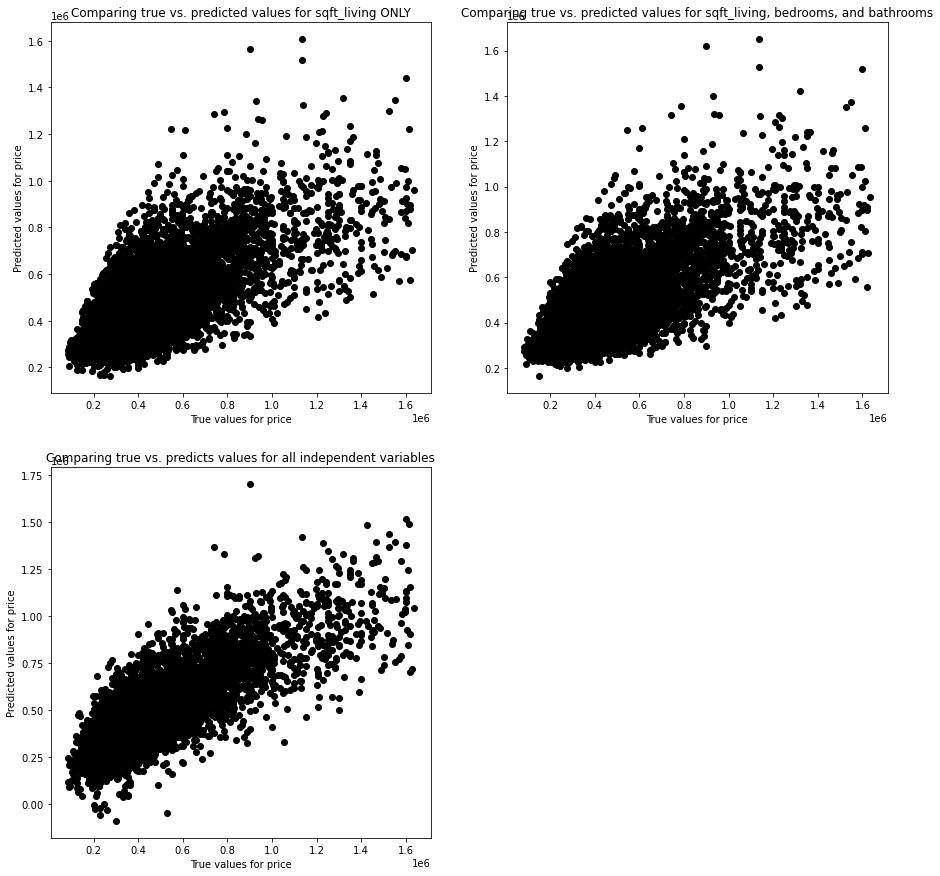

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))

axs[0][0].scatter(test_price, regr_live_pred_price_test, color='black')
axs[0][0].set_title('Comparing true vs. predicted values for sqft_living ONLY')
axs[0][0].set_xlabel('True values for price')
axs[0][0].set_ylabel('Predicted values for price')

axs[0][1].scatter(test_price, regr_live_bed_bath_pred_price_test, color='black')
axs[0][1].set_title('Comparing true vs. predicted values for sqft_living, bedrooms, and bathrooms')
axs[0][1].set_xlabel('True values for price')
axs[0][1].set_ylabel('Predicted values for price')

axs[1][0].scatter(test_price, regr_live_bed_bath_floor_lot_cond_grade_view_water_age_pred_price_test, color='black')
axs[1][0].set_title('Comparing true vs. predicts values for all independent variables')
axs[1][0].set_xlabel('True values for price')
axs[1][0].set_ylabel('Predicted values for price')

axs[1,1].set_axis_off()

## Evaluate Linear Regression Model Performance

In [22]:
# Find the RMSE and R-squared
print("---Sqft_Living Only---")
print("Root mean squared error = %.2f" % np.sqrt(mean_squared_error(test_price, regr_live_pred_price_test)))
print("R-squared = %.2f" % r2_score(test_price, regr_live_pred_price_test))

print("---Sqft_Living, Bedrooms, & Bathrooms---")
print("Root mean squared error = %.2f" % np.sqrt(mean_squared_error(test_price, regr_live_bed_bath_pred_price_test)))
print("R-squared = %.2f" % r2_score(test_price, regr_live_bed_bath_pred_price_test))

print("---All Independent Variables---")
print("Root mean squared error = %.2f" % np.sqrt(mean_squared_error(test_price, regr_live_bed_bath_floor_lot_cond_grade_view_water_age_pred_price_test)))
print("R-squared = %.2f" % r2_score(test_price, regr_live_bed_bath_floor_lot_cond_grade_view_water_age_pred_price_test))



---Sqft_Living Only---
Root mean squared error = 192755.32
R-squared = 0.44
---Sqft_Living, Bedrooms, & Bathrooms---
Root mean squared error = 191113.75
R-squared = 0.45
---All Independent Variables---
Root mean squared error = 157862.67
R-squared = 0.63


## Conclusions: Postprocessing and Visualizing the Linear Regression Fitted Model

In [23]:
columns = ['Model', 'Variable', 'Train Error', 'Test Error', 'Sum of Absolute Weights']

model1 = "%.2f X + %.2f" % (regr_live.coef_[0], regr_live.intercept_)
values1 = [model1, 'Sqft_Living', np.sqrt(mean_squared_error(train_price, regr_live_pred_price_train)),
          np.sqrt(mean_squared_error(test_price, regr_live_pred_price_test)),
          np.absolute(regr_live.coef_[0]).sum() + np.absolute(regr_live.intercept_)]


model2 = "%.2f X + %.2f X + %.2f X + %.2f" % (regr_live_bed_bath.coef_[0][0], regr_live_bed_bath.coef_[0][1], regr_live_bed_bath.coef_[0][2], regr_live_bed_bath.intercept_)
values2 = [model2, 'Sqft_Living, Bedrooms, & Bathrooms', np.sqrt(mean_squared_error(train_price, regr_live_bed_bath_pred_price_train)),
           np.sqrt(mean_squared_error(test_price, regr_live_bed_bath_pred_price_test)),
           np.absolute(regr_live_bed_bath.coef_).sum() + np.absolute(regr_live_bed_bath.intercept_)]

model3 = "%.2f X + %.2f X + %.2f X + %.2f X + %.2f X + %.2f X + %.2f X + %.2f X + %.2f X + %.2f X + %.2f" % (
    regr_live_bed_bath_floor_lot_cond_grade_view_water_age.coef_[0][0], 
    regr_live_bed_bath_floor_lot_cond_grade_view_water_age.coef_[0][1], 
    regr_live_bed_bath_floor_lot_cond_grade_view_water_age.coef_[0][2], 
    regr_live_bed_bath_floor_lot_cond_grade_view_water_age.coef_[0][3], 
    regr_live_bed_bath_floor_lot_cond_grade_view_water_age.coef_[0][4], 
    regr_live_bed_bath_floor_lot_cond_grade_view_water_age.coef_[0][5], 
    regr_live_bed_bath_floor_lot_cond_grade_view_water_age.coef_[0][6], 
    regr_live_bed_bath_floor_lot_cond_grade_view_water_age.coef_[0][7], 
    regr_live_bed_bath_floor_lot_cond_grade_view_water_age.coef_[0][8], 
    regr_live_bed_bath_floor_lot_cond_grade_view_water_age.coef_[0][9], 
    regr_live_bed_bath_floor_lot_cond_grade_view_water_age.intercept_)
values3 = [model3, 'All Independent Variables', np.sqrt(mean_squared_error(
    train_price, regr_live_bed_bath_floor_lot_cond_grade_view_water_age_pred_price_train)),
    np.sqrt(mean_squared_error(test_price, regr_live_bed_bath_floor_lot_cond_grade_view_water_age_pred_price_test)),
    np.absolute(regr_live_bed_bath_floor_lot_cond_grade_view_water_age.coef_).sum() + np.absolute(regr_live_bed_bath_floor_lot_cond_grade_view_water_age.intercept_)]



,Model,Variable,Train Error,Test Error,Sum of Absolute Weights
0,207.81 X + 85473.32,Sqft_Living,194121.620583,192755.315774,[85681.13556698506]
1,223.06 X + -32227.95 X + 8475.31 X + 144979.07,"Sqft_Living, Bedrooms, & Bathrooms",192579.974008,191113.750619,[185905.3851995853]
2,106.97 X + -18758.78 X + 32134.47 X + 37032.71...,All Independent Variables,159428.604039,157862.665502,[1242093.9358507528]


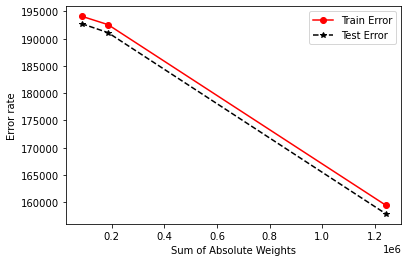

In [24]:
results = pd.DataFrame([values1, values2, values3], columns=columns)

plt.plot(results['Sum of Absolute Weights'], results['Train Error'], 'ro-')
plt.plot(results['Sum of Absolute Weights'], results['Test Error'], 'k*--')
plt.legend(['Train Error', 'Test Error'])
plt.xlabel('Sum of Absolute Weights')
plt.ylabel('Error rate')

results


## Ridge

In [25]:
ridge = linear_model.Ridge(alpha=0.4)

ridge.fit(train_live_bed_bath_floor_lot_cond_grade_view_water_age, train_price)

price_pred_train_ridge = ridge.predict(train_live_bed_bath_floor_lot_cond_grade_view_water_age)
price_pred_test_ridge = ridge.predict(test_live_bed_bath_floor_lot_cond_grade_view_water_age)

model4 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f X6 + %.2f7 + %.2f X8 + %.2f X9 + %.2f X10 + %.2f" % (
    ridge.coef_[0][0], ridge.coef_[0][1], ridge.coef_[0][2], ridge.coef_[0][3], ridge.coef_[0][4], ridge.coef_[0][5], 
    ridge.coef_[0][6], ridge.coef_[0][7], ridge.coef_[0][8], ridge.coef_[0][9], ridge.intercept_[0])
values4 = [model4, 'All Independent Variables', np.sqrt(mean_squared_error(train_price, price_pred_train_ridge)),
    np.sqrt(mean_squared_error(test_price, price_pred_test_ridge)),
    np.absolute(ridge.coef_[0].sum()) + np.absolute(ridge.intercept_[0])]
    
ridge_results = pd.DataFrame([values4], columns=columns, index=['Ridge'])
pd.concat([results, ridge_results])


,Model,Variable,Train Error,Test Error,Sum of Absolute Weights
0,207.81 X + 85473.32,Sqft_Living,194121.620583,192755.315774,[85681.13556698506]
1,223.06 X + -32227.95 X + 8475.31 X + 144979.07,"Sqft_Living, Bedrooms, & Bathrooms",192579.974008,191113.750619,[185905.3851995853]
2,106.97 X + -18758.78 X + 32134.47 X + 37032.71...,All Independent Variables,159428.604039,157862.665502,[1242093.9358507528]
Ridge,106.97 X + -18760.67 X2 + 32132.63 X3 + 37033....,All Independent Variables,159428.612133,157864.934536,1203743.179749


## Lasso

In [26]:
lasso = linear_model.Lasso(alpha=0.02)
lasso.fit(train_live_bed_bath_floor_lot_cond_grade_view_water_age, train_price)

price_pred_train_lasso = lasso.predict(train_live_bed_bath_floor_lot_cond_grade_view_water_age)
price_pred_test_lasso = lasso.predict(test_live_bed_bath_floor_lot_cond_grade_view_water_age)

model5 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f X6 + %.2f7 + %.2f X8 + %.2f X9 + %.2f X10 + %.2f" % (
    lasso.coef_[0], lasso.coef_[1], lasso.coef_[2], lasso.coef_[3], lasso.coef_[4], lasso.coef_[5], 
    lasso.coef_[6], lasso.coef_[7], lasso.coef_[8], lasso.coef_[9], lasso.intercept_[0])
values5 = [model5, 'All Independent Variables', np.sqrt(mean_squared_error(train_price, price_pred_train_lasso)),
    np.sqrt(mean_squared_error(test_price, price_pred_test_lasso)),
    np.absolute(lasso.coef_[0].sum()) + np.absolute(lasso.intercept_[0])]

lasso_results = pd.DataFrame([values5], columns=columns, index=['Lasso'])
pd.concat([results, ridge_results, lasso_results])

,Model,Variable,Train Error,Test Error,Sum of Absolute Weights
0,207.81 X + 85473.32,Sqft_Living,194121.620583,192755.315774,[85681.13556698506]
1,223.06 X + -32227.95 X + 8475.31 X + 144979.07,"Sqft_Living, Bedrooms, & Bathrooms",192579.974008,191113.750619,[185905.3851995853]
2,106.97 X + -18758.78 X + 32134.47 X + 37032.71...,All Independent Variables,159428.604039,157862.665502,[1242093.9358507528]
Ridge,106.97 X + -18760.67 X2 + 32132.63 X3 + 37033....,All Independent Variables,159428.612133,157864.934536,1203743.179749
Lasso,106.97 X + -18758.76 X2 + 32134.39 X3 + 37032....,All Independent Variables,159428.604039,157862.680449,855628.992104


## Hyperparameter Selection via Cross-Validation

#### Vary the hyperparameter $\alpha$ for ridge regression to a range between 0.2 and 1.0.
- Using the RidgeCV() function, we can train a model with 5-fold cross-validation and select the best hyperparameter value. 

In [27]:
ridge = linear_model.RidgeCV(cv=5,alphas=[0.2, 0.4, 0.6, 0.8, 1.0])
ridge.fit(train_live_bed_bath_floor_lot_cond_grade_view_water_age, train_price)

price_pred_train_ridge = ridge.predict(train_live_bed_bath_floor_lot_cond_grade_view_water_age)
price_pred_test_ridge = ridge.predict(test_live_bed_bath_floor_lot_cond_grade_view_water_age)

model4 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f X6 + %.2f7 + %.2f X8 + %.2f X9 + %.2f X10 + %.2f" % (
    ridge.coef_[0][0], ridge.coef_[0][1], ridge.coef_[0][2], ridge.coef_[0][3], ridge.coef_[0][4], ridge.coef_[0][5], 
    ridge.coef_[0][6], ridge.coef_[0][7], ridge.coef_[0][8], ridge.coef_[0][9], ridge.intercept_[0])
values4 = [model4, 'All Independent Variables', np.sqrt(mean_squared_error(train_price, price_pred_train_ridge)),
    np.sqrt(mean_squared_error(test_price, price_pred_test_ridge)),
    np.absolute(ridge.coef_[0].sum()) + np.absolute(ridge.intercept_[0])]
print("Selected alpha = %.2f" % ridge.alpha_)

ridge_results = pd.DataFrame([values4], columns=columns, index=['RidgeCV'])
pd.concat([results, ridge_results])

Selected alpha = 1.00


,Model,Variable,Train Error,Test Error,Sum of Absolute Weights
0,207.81 X + 85473.32,Sqft_Living,194121.620583,192755.315774,[85681.13556698506]
1,223.06 X + -32227.95 X + 8475.31 X + 144979.07,"Sqft_Living, Bedrooms, & Bathrooms",192579.974008,191113.750619,[185905.3851995853]
2,106.97 X + -18758.78 X + 32134.47 X + 37032.71...,All Independent Variables,159428.604039,157862.665502,[1242093.9358507528]
RidgeCV,106.98 X + -18763.46 X2 + 32129.86 X3 + 37033....,All Independent Variables,159428.653686,157868.306937,1202511.820035


#### Vary the hyperparameter $\alpha$ for lasso regression to a range between 0.01 and 1.0.
- Using the LassoCV() function, we can train a model with 7-fold cross-validation and select the best hyperparameter value. 

In [28]:
lasso = linear_model.LassoCV(cv=7, alphas=[0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 1.0])
lasso.fit(train_live_bed_bath_floor_lot_cond_grade_view_water_age, train_price.values.reshape(train_price.shape[0]))

price_pred_train_lasso = lasso.predict(train_live_bed_bath_floor_lot_cond_grade_view_water_age)
price_pred_test_lasso = lasso.predict(test_live_bed_bath_floor_lot_cond_grade_view_water_age)

model5 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f X6 + %.2f7 + %.2f X8 + %.2f X9 + %.2f X10 + %.2f" % (
    lasso.coef_[0], lasso.coef_[1], lasso.coef_[2], lasso.coef_[3], lasso.coef_[4], lasso.coef_[5], 
    lasso.coef_[6], lasso.coef_[7], lasso.coef_[8], lasso.coef_[9], lasso.intercept_)
values5 = [model5, 'All Independent Variables', np.sqrt(mean_squared_error(train_price, price_pred_train_lasso)),
    np.sqrt(mean_squared_error(test_price, price_pred_test_lasso)),
    np.absolute(lasso.coef_[0].sum()) + np.absolute(lasso.intercept_)]
print("Selected alpha = %.2f" % lasso.alpha_)

lasso_results = pd.DataFrame([values5], columns=columns, index=['LassoCV'])
pd.concat([results, ridge_results, lasso_results])

Selected alpha = 0.01


,Model,Variable,Train Error,Test Error,Sum of Absolute Weights
0,207.81 X + 85473.32,Sqft_Living,194121.620583,192755.315774,[85681.13556698506]
1,223.06 X + -32227.95 X + 8475.31 X + 144979.07,"Sqft_Living, Bedrooms, & Bathrooms",192579.974008,191113.750619,[185905.3851995853]
2,106.97 X + -18758.78 X + 32134.47 X + 37032.71...,All Independent Variables,159428.604039,157862.665502,[1242093.9358507528]
RidgeCV,106.98 X + -18763.46 X2 + 32129.86 X3 + 37033....,All Independent Variables,159428.653686,157868.306937,1202511.820035
LassoCV,106.97 X + -18758.77 X2 + 32134.43 X3 + 37032....,All Independent Variables,159428.604039,157862.672976,855629.277081
